# Julia Shaw 17.1 ([Bio](https://games.crossfit.com/athlete/259720))

<table style="float: left;border-style:hidden">
<tr style="border-style:hidden">
<td>
Age: 20 ans
</td>
</tr>
<tr style="border-style:hidden"><td>
Poids: 140 lbs
</td></tr>
<tr style="border-style:hidden"><td>
Taille:  170 cm
</td></tr>
</table>


<img style="float: right;" src="pic.jpeg">

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import datetime
import time
import math

In [3]:
# Read and convert checkpoints
checkpoints = [l.split('-')[1].strip() for l in open('split_times.txt').readlines()[1:-1]][::-1]
checkpoints = np.array([datetime.datetime.strptime(cp, "%H:%M:%S.%f") for cp in checkpoints])

# Convert checkpoints to split times
splits = (checkpoints - np.roll(checkpoints, 1))[1:]
splits = [split.total_seconds() for split in splits]

In [4]:
def mouvement_label():
    # AMRAP, generate labels forever
    round_ = 1
    while True:
        for i in range(5):
            yield "Lunge Forward"
        for i in range(5):
            yield "Lunge Back"
        for i in range(16):
            # Two rounds with Bar MU
            if round_ % 3 == 0 or round_ % 4 == 0:
                yield "Bar MU"
            # Two rounds with TTB
            else:
                yield "Toes to Bar"
        for i in range(8):
            yield "Power Clean"
        round_ += 1

def round_label():
    round_ = 1
    while True:
        for i in range(5):
            yield "Lunge Forward {}".format(round_)
        for i in range(5):
            yield "Lunge Back {}".format(round_)
        for i in range(16):
            # Two rounds with Bar MU
            if round_ % 3 == 0 or round_ % 4 == 0:
                yield "Bar MU {}".format(round_ %3 + 1)
            # Two rounds with TTB
            else:
                yield "Toes to Bar {}".format(round_)
        for i in range(8):
            yield "Power Clean {}".format(round_)
        round_ += 1

In [5]:
mvmt_gen = mouvement_label()
round_gen = round_label()
mvmt = [next(mvmt_gen) for i in range(len(splits))]
rounds = [next(round_gen) for i in range(len(splits))]

In [6]:
df = DataFrame(
    {
        "rep": range(1,len(splits)+1),
        "Movement": mvmt,
        "split": splits,
        "round": rounds
    }
)

## Split time per rep

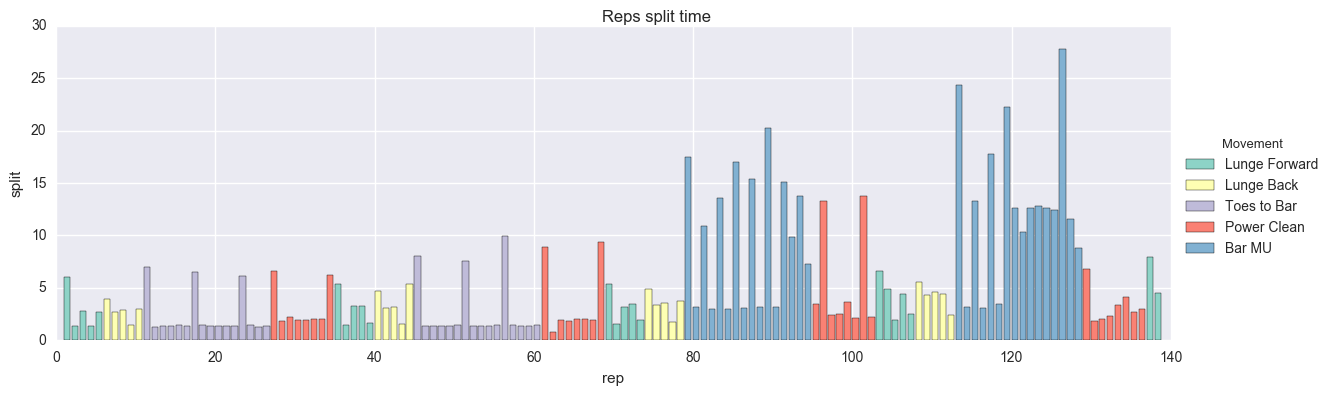

In [7]:
g = sns.FacetGrid(df, size=4, aspect=3, hue='Movement', palette='Set3')
g.map(plt.bar, 'rep', 'split').add_legend()
_ = g.fig.suptitle("Reps split time")

* Shave a few seconds on break time on second round of TTB
* Not sure what happened on the third round of power clean. Looks like there was a break on the second rep, but it might have been me who screwed up
* Definitively pick up the dumbbell faster on the third round before the forward lunges
* Look at the bar MU analysis a little bit further down this report

## Time per mouvements

### Total time

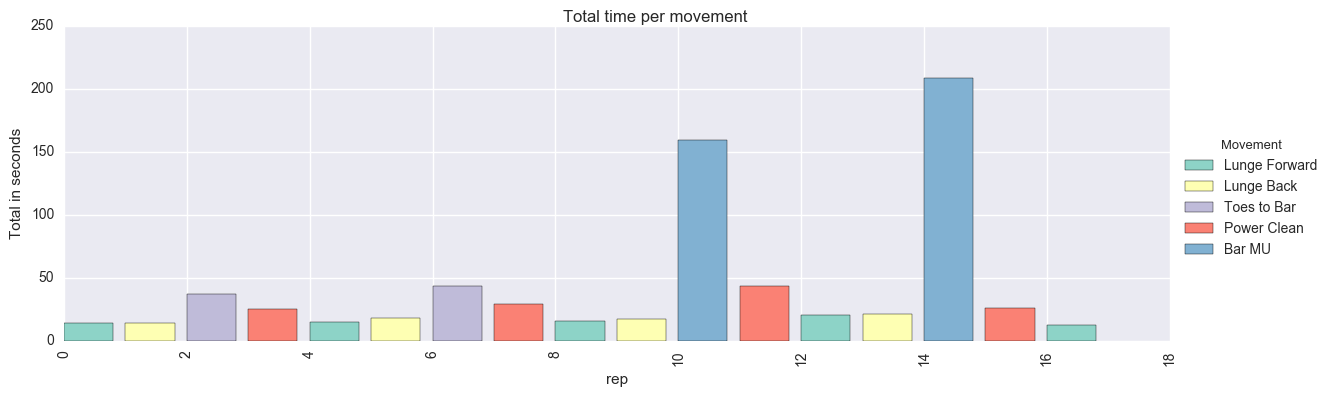

In [8]:
g = df.groupby('round')
_df = g.aggregate({"split": sum, "rep": min, 'Movement': min})
_df = _df.sort_values('rep').reset_index()
_df['rep'] = range(_df.shape[0])

g = sns.FacetGrid(_df, size=4, aspect=3, hue='Movement', palette='Set3')
g.map(plt.bar, 'rep', 'split').add_legend()
g.set_xticklabels(label=_df['Movement'],  rotation=90)
g.set_ylabels("Total in seconds")
_ = g.fig.suptitle("Total time per movement")

* Total time in bar MU is obvisouly where you can gain time, especially the second time around.
* Obviously that's easier said than done. Look a little bit further down again

### Mean time per movement

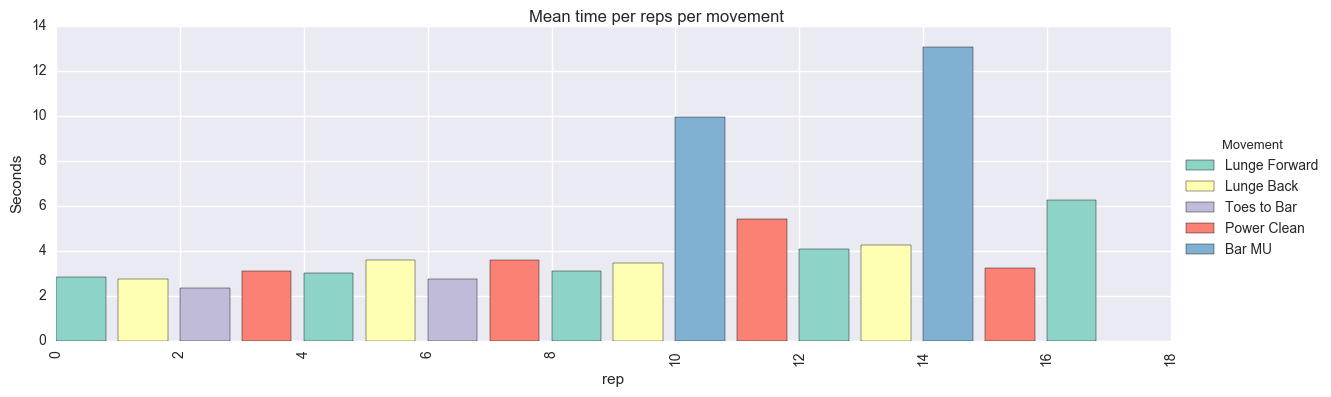

In [9]:
g = df.groupby('round')
_df = g.aggregate({"split": np.mean, "rep": min, 'Movement': min})
_df = _df.sort_values('rep').reset_index()
_df['rep'] = range(_df.shape[0])

g = sns.FacetGrid(_df, size=4, aspect=3, hue='Movement', palette='Set3')
g.map(plt.bar, 'rep', 'split').add_legend()
g.set_xticklabels(label=_df['Movement'],  rotation=90)
g.set_ylabels("Seconds")
_ = g.fig.suptitle("Mean time per reps per movement")

##### First round of Bar MU 
* Has a decent mean time per rep
* From the break down per rep (first graph) it's a pattern of two bar MU and then break
* Last four there was a break at the top before starting the second bar MU. Maybe cut down on those.
* Average time of 10 seconds

##### Second round of Bar MU
* Fatigue is there 
* From first graph it starts with a couple of set of two with much longer break in-between than the first round
* About half way through there were singles
* Average time of 13 seconds

## Where to gain

* A little bit on break time in the power clean, especially third time. Maybe do a 5-3 rep scheme with shorter breaks. Estimated gain, 5-6 seconds
* You can probably shorten the breaks on the second round of TTB. Estimated gain, 4-6 seconds
* Have an average time of 10 seconds on the second round of bar MU, like the first one. Estimated gain, 45-48 seconds.
* I'd suggest doing singles (MU), maybe even on the first round. It takes energy to hold on to the bar when going for a few unbroken. 
* On two occasions you started the lunges about a foot behind the line. I think that you could have saved a step both times
* You sometimes did the power clean a little bit far from the line. Get closer. It was especially obvious on the last power cleans. Control your dumbbell when you're done :o) 